In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

from pandas.plotting import lag_plot

In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

dataset.head()

# Output berbentuk Series, bukan DataFrame (karena nilai squeeze=True)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
dataset.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


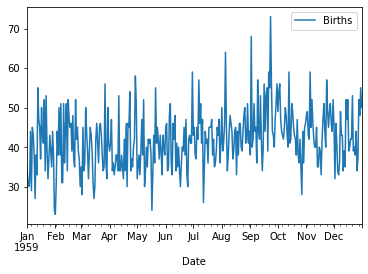

In [ ]:
dataset.plot()
plt.show()

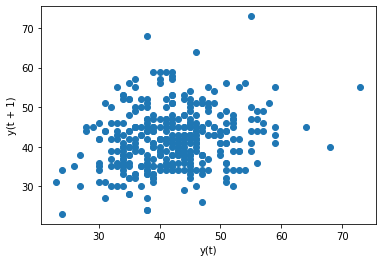

In [ ]:
lag_plot(dataset)
plt.show()

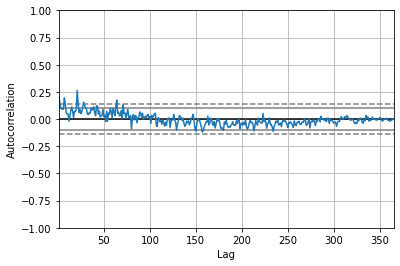

In [ ]:
pd.plotting.autocorrelation_plot(dataset)
plt.show()

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [dataset.index[i].month for i in range(len(dataset))] 
dataframe['day'] = [dataset.index[i].day for i in range(len(dataset))] 
dataframe['births'] = dataset['Births'].values 
print(dataframe.head(5))

   month  day  births
0      1    1      35
1      1    2      32
2      1    3      30
3      1    4      31
4      1    5      44


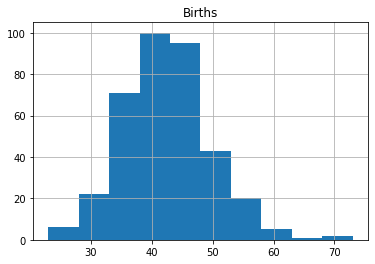

In [ ]:
dataset.hist()
plt.show()

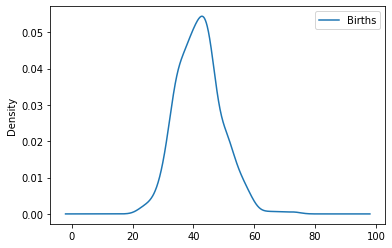

In [ ]:
dataset.plot(kind='kde') 
plt.show()

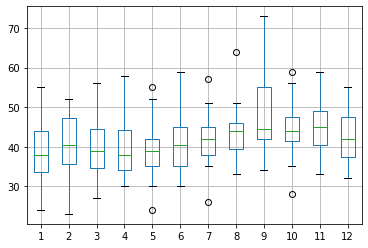

In [ ]:
one_year = dataset['1959']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)

months.columns = range(1, 13)
months.boxplot()
plt.show()

In [ ]:
values = dataset.values
values = values.astype('float32')

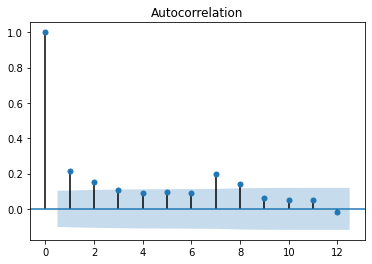

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=12, ax=plt.gca())
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_size = int(len(values) * 0.50)
train, test = values[0:train_size], values[train_size:]

In [ ]:
values = dataset.values
train, test = values[:len(values)-9], values[len(values)-9:]

print(len(values))
print(values)
print(len(values[1:len(values)-9]))
print(len(values[len(values)-9:]))

365
[[35]
 [32]
 [30]
 [31]
 [44]
 [29]
 [45]
 [43]
 [38]
 [27]
 [38]
 [33]
 [55]
 [47]
 [45]
 [37]
 [50]
 [43]
 [41]
 [52]
 [34]
 [53]
 [39]
 [32]
 [37]
 [43]
 [39]
 [35]
 [44]
 [38]
 [24]
 [23]
 [31]
 [44]
 [38]
 [50]
 [38]
 [51]
 [31]
 [31]
 [51]
 [36]
 [45]
 [51]
 [34]
 [52]
 [47]
 [45]
 [46]
 [39]
 [48]
 [37]
 [35]
 [52]
 [42]
 [45]
 [39]
 [37]
 [30]
 [35]
 [28]
 [45]
 [34]
 [36]
 [50]
 [44]
 [39]
 [32]
 [39]
 [45]
 [43]
 [39]
 [31]
 [27]
 [30]
 [42]
 [46]
 [41]
 [36]
 [45]
 [46]
 [43]
 [38]
 [34]
 [35]
 [56]
 [36]
 [32]
 [50]
 [41]
 [39]
 [41]
 [47]
 [34]
 [36]
 [33]
 [35]
 [38]
 [38]
 [34]
 [53]
 [34]
 [34]
 [38]
 [35]
 [32]
 [42]
 [34]
 [46]
 [30]
 [46]
 [45]
 [54]
 [34]
 [37]
 [35]
 [40]
 [42]
 [58]
 [51]
 [32]
 [35]
 [38]
 [33]
 [39]
 [47]
 [38]
 [52]
 [30]
 [34]
 [40]
 [35]
 [42]
 [41]
 [42]
 [38]
 [24]
 [34]
 [43]
 [36]
 [55]
 [41]
 [45]
 [41]
 [37]
 [43]
 [39]
 [33]
 [43]
 [40]
 [38]
 [45]
 [46]
 [34]
 [35]
 [48]
 [51]
 [36]
 [33]
 [46]
 [42]
 [48]
 [34]
 [41]
 [35]
 [40]


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)
print('Coefficients:', model_fit.params)

Lag: 16
Coefficients: [ 1.79488349e+01  1.47894084e-01  7.90705637e-02  5.79800478e-02
  3.04839348e-02  5.51150054e-02  1.38577625e-03  1.50394415e-01
  5.00225830e-02 -3.09227356e-02 -6.38908935e-03  2.30823070e-02
 -7.59956210e-02 -1.82016174e-02  2.34612407e-02  5.98248241e-02
  2.72549013e-02]


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
  rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

predicted=44.676663, expected=40.000000
predicted=43.186473, expected=38.000000
predicted=42.549439, expected=44.000000
predicted=41.811233, expected=34.000000
predicted=41.280093, expected=37.000000
predicted=42.647156, expected=52.000000
predicted=42.813516, expected=48.000000
predicted=43.157317, expected=55.000000
predicted=43.352963, expected=50.000000
Test RMSE: 6.904


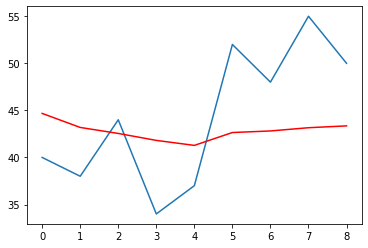

In [ ]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(dataset, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Births   No. Observations:                  364
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1245.037
Method:                       css-mle   S.D. of innovations              7.392
Date:                Thu, 17 Sep 2020   AIC                           2504.073
Time:                        22:59:30   BIC                           2531.353
Sample:                    01-02-1959   HQIC                          2514.916
                         - 12-31-1959                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0434      0.125      0.348      0.728      -0.201       0.288
ar.L1.D.Births    -0.7240      0.052    -13.976      0.000      -0.826      -0.622
ar.L2.D.Births    -0.5430      0.063

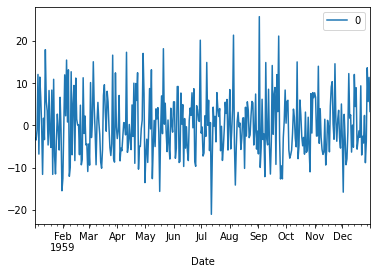

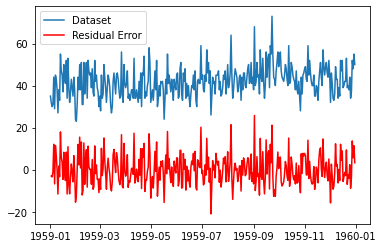

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(dataset)
plt.plot(residuals,  color='red')
plt.legend(['Dataset','Residual Error'])

In [ ]:
residuals

,0
Date,
1959-01-02,-3.043403
1959-01-03,-3.448935
1959-01-04,-1.129948
1959-01-05,12.071574
1959-01-06,-6.795554
...,...
1959-12-27,-3.760610
1959-12-28,13.653697
1959-12-29,5.658687


In [ ]:
print(residuals.describe())

                0
count  364.000000
mean    -0.006510
std      7.404761
min    -21.067802
25%     -5.392351
50%     -0.899122
75%      4.803230
max     25.769530


In [ ]:
values = dataset.values
size = int(len(values) * 0.66)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	prediction = output[0]
	predictions.append(prediction)
	expected = test[t]
	history.append(expected)
	print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=43.164026, expected=51.000000
predicted=46.686556, expected=41.000000
predicted=45.779041, expected=44.000000
predicted=44.804408, expected=38.000000
predicted=42.180905, expected=68.000000
predicted=49.475299, expected=40.000000
predicted=48.075054, expected=42.000000
predicted=44.044629, expected=51.000000
predicted=47.323511, expected=44.000000
predicted=47.368185, expected=45.000000
predicted=48.860471, expected=36.000000
predicted=42.360363, expected=57.000000
predicted=46.650582, expected=44.000000
predicted=46.923718, expected=42.000000
predicted=44.240486, expected=53.000000
predicted=46.542111, expected=42.000000
predicted=45.976001, expected=34.000000
predicted=44.662097, expected=40.000000
predicted=42.112874, expected=56.000000
predicted=45.698052, expected=44.000000
predicted=45.295099, expected=53.000000
predicted=45.327316, expected=55.000000
predicted=47.714677, expected=39.000000
predicted=47.208313, expected=59.000000
predicted=51.509437, expected=55.000000


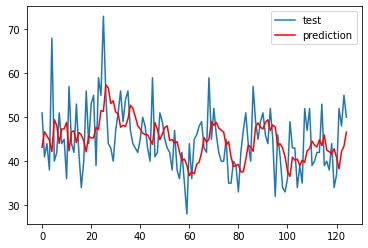

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(5, 9)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(5, 0, 0) MSE=58.919
ARIMA(5, 0, 1) MSE=58.344
ARIMA(5, 1, 0) MSE=57.931
ARIMA(5, 1, 1) MSE=56.101
ARIMA(5, 1, 2) MSE=55.097
ARIMA(5, 2, 0) MSE=82.304
ARIMA(6, 0, 0) MSE=58.773
ARIMA(6, 0, 1) MSE=59.454
ARIMA(6, 1, 0) MSE=53.187
ARIMA(6, 1, 1) MSE=57.056
ARIMA(6, 1, 2) MSE=55.703
ARIMA(6, 2, 0) MSE=69.753
ARIMA(7, 0, 0) MSE=55.683
ARIMA(7, 0, 1) MSE=56.061
ARIMA(7, 0, 2) MSE=58.557
ARIMA(7, 1, 0) MSE=56.658
ARIMA(7, 1, 1) MSE=53.266
ARIMA(7, 1, 2) MSE=54.500
ARIMA(7, 2, 0) MSE=66.158
ARIMA(7, 2, 1) MSE=57.194
ARIMA(8, 0, 0) MSE=56.984
ARIMA(8, 0, 1) MSE=57.224
ARIMA(8, 0, 2) MSE=58.135
ARIMA(8, 1, 0) MSE=57.290
ARIMA(8, 1, 1) MSE=55.210
ARIMA(8, 1, 2) MSE=55.283
ARIMA(8, 2, 0) MSE=66.034
ARIMA(8, 2, 1) MSE=57.794
ARIMA(8, 2, 2) MSE=56.334
Best ARIMA(6, 1, 0) MSE=53.187
